In [1]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt;
if "bmh" in plt.style.available: plt.style.use("bmh");

# scientific
import numpy as np;
import scipy as scp;
import scipy.stats;

# rise config
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'simple',
              'start_slideshow_at': 'selected',
})

{'start_slideshow_at': 'selected', 'theme': 'simple'}

# EECS 545:  Machine Learning
## Lecture 05:  Linear Regression II
* Instructor:  **Jacob Abernethy**
* Date:  January 25, 2015

*Lecture Exposition Credit: Benjamin Bray*

## Logistics
* HW1 due today! HW2 released tonight.
* HW2 requires submission to a *Kaggle* contest (more soon)
* Coming up on Wed.:
    * New method of serving lecture materials
    * Opportunities for extra credit + improving course materials
* No class on February 3!

### Outline for today

- Review of Least Squares and curve fitting
- Overfitting + Regularization + Least Squares
- Review of Maximum Likelihood estimation
- Maximum Likelihood interpretation of linear regression
- Locally-weighted linear regression
- Logistic Regression

## Least Squares:  Gradient via Matrix Calculus

- Compute the gradient and set to zero

$$
\begin{align}
\nabla_w E(w) &= \nabla_w \left[ \frac{1}{2} w^T \Phi^T \Phi w - w^T \Phi^T t + \frac{1}{2} t^T t \right] \\
&= \Phi^T \Phi w - \Phi^T t = 0
\end{align}
$$

- Solve the resulting **normal equation**:
    $$
    \Phi^T \Phi w = \Phi^T t \\
    w_{ML} = (\Phi^T \Phi)^{-1} \Phi^T t
    $$

where

$$
\Phi = \begin{bmatrix}
\phi_0(\vec{x}_1) & \phi_1(\vec{x}_1) & \cdots & \phi_{M-1}(\vec{x}_1) \\
\phi_0(\vec{x}_2) & \phi_1(\vec{x}_2) & \cdots & \phi_{M-1}(\vec{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(\vec{x}_N) & \phi_1(\vec{x}_N) & \cdots & \phi_{M-1}(\vec{x}_N) \\
\end{bmatrix}=\begin{bmatrix}
\phi(\vec{x}_1)^{\top}\\
\phi(\vec{x}_2)^{\top}\\
\phi(\vec{x}_3)^{\top}\\
\vdots\\
\phi(\vec{x}_N)^{\top}
\end{bmatrix}
$$

> This is the *Moore-Penrose pseudoinverse*, $\Phi^\dagger = (\Phi^T \Phi)^{-1} \Phi^T$ applied to solve the linear system $\Phi w \approx t$.

## Back to curve-fitting examples...

## Polynomial Curve Fitting

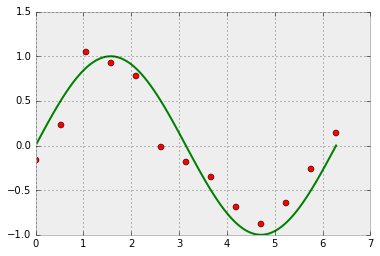

In [2]:
# plot sine wave
xx = np.linspace(0, 2*np.pi, 100);
plt.plot(xx, np.sin(xx), '-g');
# plot data
x = np.linspace(0, 2*np.pi, 13);
y = np.sin(x) + np.random.randn(x.shape[0]) / 5;
plt.plot(x,y, 'or');

$$y(x, w) = w_0 + w_1x + w_2 x^2 + \cdots + w_M x^M = \sum_{j=0}^M w_j x^j$$

## 0th Order Polynomial

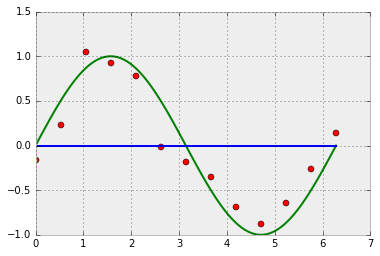

In [3]:
coeffs = np.polyfit(x, y, 0);
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## 3rd Order Polynomial

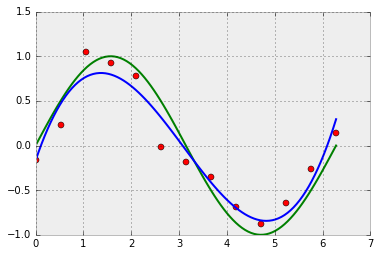

In [4]:
coeffs = np.polyfit(x, y, 3);
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## 12th Order Polynomial

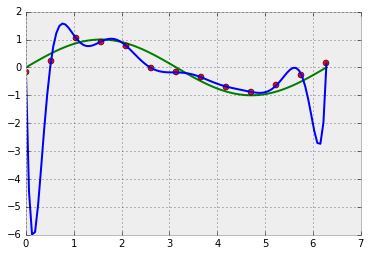

In [5]:
coeffs = np.polyfit(x, y, 12);
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## Overfitting

![Overfitting](images/overfitting.png)

Root-Mean-Square (RMS) Error:  $E_{RMS} = \sqrt{2E(w^*) / N}$

## Polynomial Coefficients

![Polynomial Coefficients](images/polynomial-coefficients.png)

## Data Set Size:  $N = 15$

(12th order polynomial)

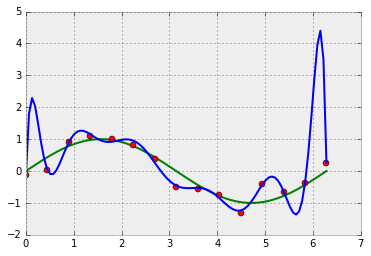

In [2]:
# sine wave
xx = np.linspace(0, 2*np.pi, 100);
# data
N = 15;
x = np.linspace(0, 2*np.pi, N);
y = np.sin(x) + np.random.randn(x.shape[0]) / 5;
# fit
coeffs = np.polyfit(x, y, 12); poly = np.poly1d(coeffs);
# plt.bar(range(13),coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## Data Set Size:  $N = 100$

(12th order polynomial)

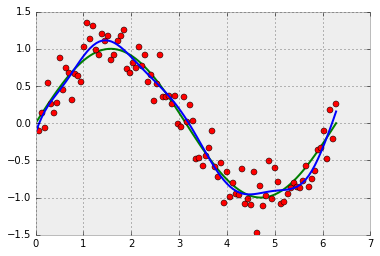

In [3]:
# sine wave
xx = np.linspace(0, 2*np.pi, 100);
# data
N = 100;
x = np.linspace(0, 2*np.pi, N);
y = np.sin(x) + np.random.randn(x.shape[0]) / 5;
# fit
coeffs = np.polyfit(x, y, 12);
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

# How do we choose the degree of our polynomial?

## Rule of Thumb

- For a small number of datapoints, use a low degree
    - Otherwise, the model will overfit!
- As you obtain more data, you can gradually increase the degree
    - Add more features to represent more data
    - **Warning:**  Your model is still limited by the finite amount of data available.  The optimal model for finite data cannot be an infinite-dimensional polynomial!)
- Use **regularization** to control model complexity.

# Regularized Linear Regression

## Regularized Least Squares

- Consider the error function $E_D(w) + \lambda E_W(w)$
    - Data term $E_D(w)$
    - Regularization term $E_W(w)$
- With the sum-of-squares error function and quadratic regularizer,
$$
    \widetilde{E}(w) = \frac{1}{2} \sum_{n=1}^N (y(x_n, w) - t_n)^2 +
    \boxed{\frac{\lambda}{2} || w ||^2}
$$

- This is minimized by

    $$
    w = (\lambda I + \Phi^T \Phi)^{-1} \Phi^T t
    $$

## Regularized Least Squares:  Derivation

Recall that our objective function is

$$\begin{eqnarray}
    E(w)
    &=& \frac{1}{2} \sum_{n=1}^N (w^T \phi(x^{(n)}) - t^{(n)})^2 + \frac{\lambda}{2} w^T w \\
    &=& \frac{1}{2} w^T \Phi^T \Phi w - w^T \Phi^T t + \frac{1}{2} t^T t + \frac{\lambda}{2} w^T w
    \end{eqnarray}$$
where 
$$
\Phi= \begin{bmatrix}
\phi_0(\vec{x}_1) & \phi_1(\vec{x}_1) & \cdots & \phi_{M-1}(\vec{x}_1) \\
\phi_0(\vec{x}_2) & \phi_1(\vec{x}_2) & \cdots & \phi_{M-1}(\vec{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(\vec{x}_N) & \phi_1(\vec{x}_N) & \cdots & \phi_{M-1}(\vec{x}_N) \\
\end{bmatrix}=\begin{bmatrix}
\phi(\vec{x}_1)^{\top}\\
\phi(\vec{x}_2)^{\top}\\
\phi(\vec{x}_3)^{\top}\\
\vdots\\
\phi(\vec{x}_N)^{\top}
\end{bmatrix}\\
\implies \Phi^{\top}=\begin{bmatrix}
\phi(\vec{x}_1) & \phi(\vec{x}_2) & \phi(\vec{x}_3) \cdots \phi(\vec{x}_N)
\end{bmatrix}\\
\implies w^{\top}\Phi^{\top}=\begin{bmatrix}
w^{\top}\phi(\vec{x}_1) & w^{\top}\phi(\vec{x}_2) & w^{\top}\phi(\vec{x}_3) \cdots w^{\top}\phi(\vec{x}_N)
\end{bmatrix}\\
$$

## Regularized Least Squares:  Derivation

Compute gradient and set to zero:

$$
\begin{align}
\nabla_w E(w)
&= \nabla_w \left[ 
       \frac{1}{2} w^T \Phi^T \Phi w - w^T \Phi^T t + \frac{1}{2} t^T t 
       + \frac{\lambda}{2} w^T w
   \right] \\
&= \Phi^T \Phi w - \Phi^T t + \lambda w \\
&= (\Phi^T \Phi + \lambda I) w - \Phi^T t = 0
\end{align}
$$

Therefore, we get $\boxed{w_{ML} = (\Phi^T \Phi + \lambda I)^{-1} \Phi^T t}$

## Regularized Least Squares:  Norms

We can make use of the various $L_p$ norms for different regularizers:

$$
\widetilde{E}(w)
= \frac{1}{2} \sum_{n=1}^N (t_n - w^T \phi(x_n))^2
+ \frac{\lambda}{2} \sum_{j=1}^M |w_j|^q
$$

![Norms](images/p-norms.png)

## Regularized Least Squares:  Comparison

*Lasso* tends to generate sparser solutions than a quadratic regularizer (more on Lasso later)

![Regularization](images/lasso-vs-ridge.png)

## L2 Regularization:  $\lambda = e^{-18}$

![L2 Regularization](images/l2-reg-lambda-18.png)

## L2 Regularization:  $\lambda = 1$

![L2 Regularization](images/l2-reg-lambda-0.png)

## L2 Regularization:  $E_{RMS}$ vs $\ln\lambda$

![E_RMS vs ln(lambda)](images/l2-reg-erms-vs-lambda.png)

*NOTE: For simplicity of presentation, we divided the data into training set and test set. However, it’s not legitimate to find the optimal hyperparameter based on the test set. We will talk about legitimate ways of doing this when we cover model selection and cross-validation.*

## L2 Regularization:  Polynomial Coefficients

![Polynomial Coefficients](images/l2-reg-coeffs.png)

## Regularized Least Squares:  Summary

- Simple modification of linear regression
- L2 Regularization controls the tradeoff between *fitting error* and *complexity*.
    - Small L2 regularization results in complex models, but with risk of overfitting
    - Large L2 regularization results in simple models, but with risk of underfitting
- It is important to find an optimal regularization that *balances* between the two

## Break time!

<img src="http://a3.files.blazepress.com/image/upload/MTMzODU0OTIwNTY5ODQzNjgy.gif"/>

### Maximum Likelihood & MAP

**Maximum Likelihood:** Pick the parameters under which the data is most probable under our model.

$$
w_{ML} = \arg\max_w P(\mathcal{X} | w)
$$

**Maximum a Posteriori:** Pick the parameters under which the data is most probable, weighted by our prior beliefs.

$$
w_{MAP} = \arg\max_w P(\mathcal{X} | w) P(w)
$$


# Maximum Likelihood Interpretation of Least Squares Regression

### Gaussian Distribution

$$ 
\mathcal{N}(x, \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[ \frac{(x-\mu)^2}{2\sigma^2} \right]
$$

> **TIP:**  Scipy contains useful methods for dealing with common distributions in the [`scipy.stats` module](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)!

### Gaussian Distribution

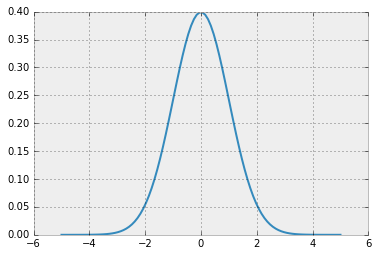

In [4]:
# parameters
mean, variance = 0, 5;
xvals = np.linspace(mean-5, mean+5, 100);
# get pdf from scipy.stats
plt.plot(xvals, scp.stats.norm.pdf(xvals))

### Maximum Likelihood $w$

- Assume a stochastic model 
$$
\begin{gather}
t = y(x,w) + \epsilon =w^T\phi(x) + \epsilon \\ \epsilon \sim \mathcal{N}(0, \beta^{-1})
\end{gather}
$$

- This gives the following **likelihood function**:
$$
p(t|x,w,\beta) = \mathcal{N}(t|y(x,w),\beta^{-1})=\mathcal{N}(t|w^T\phi(x),\beta^{-1})
$$

### Maximum Likelihood $w$

- With inputs $X=(x_1, \dots, x_n)$ and target values $t=(t_1,\dots,t_n)$, the data likelihood is
$$
p(t|X,w,\beta) 
= \prod_{n=1}^N \mathcal{N}(t_n|w^T\phi(x_n),\beta^{-1})
= \prod_{n=1}^N \left[ \sqrt{\frac{\beta}{2\pi}}e^{-\frac{\beta}{2}(t_n-w^T\phi(x_n))^2}  \right]
=(\frac{\beta}{2\pi})^{\frac{N}{2}}exp({-\frac{\beta}{2}\sum_{n=1}^N(t_n-w^T\phi(x_n))^2})
$$

### Log Likelihood

- We will now show that the log likelihood is
$$
\ln p(t|X,w,\beta) = \frac{N}{2} \ln\beta - \frac{N}{2} \ln{2\pi}- \beta E_D(w)
$$
    - where $E_D(w) = \frac{1}{2} \sum_{n=1}^N \left[ t_n-w^T\phi(x_n) \right]^2$
    
> **Note:**  Bishop book drops $X$ from the notation

### Details of Derivation

From $P(t| x,w) = \sqrt\frac{\beta}{2\pi} \exp(-\beta || t-w^T \phi(x) ||^2)$ we have
$$
\begin{align}
&\;  \log P(t_1, \dots, t_N | x,w) \\
=&\; \log \prod_{k=1}^N \mathcal{N}(t_k| w^T \phi(x^{(k)}), \beta^{-1}) \\
=& \sum_{k=1}^N \log \left[ \sqrt\frac{\beta}{2\pi} \exp(-\beta\cdot || t_k-w^T \phi(x^{(k)}) ||^2) \right]
\end{align}
$$

### Details of Derivation

$$
\begin{align}
=&\; \sum_{k=1}^N \log \left[ \sqrt\frac{\beta}{2\pi} \exp(-\beta\cdot ( t_k-w^T \phi(x^{(k)}) )^2) \right] \\
=&\; \sum_{k=1}^N \left[ \frac{1}{2} \log\beta - \frac{1}{2}\log{2\pi} - \frac{\beta}{2}( t_k - w^T\phi(x_k) )^2 \right] \\
=&\; \frac{N}{2} \log\beta - \frac{N}{2} \log{2\pi} - \sum_{k=1}^N \frac{\beta}{2}( t_k - w^T\phi(x_k) )^2 \\
\end{align}
$$

### Maximize the Likelihood

- Maximizing the likelihood is equivalent to **minimizing the sum of squared errors**

- Set gradient log-likelihood to zero,
$$
\begin{align}
\nabla_w \ln p(t | w, \beta)
&= \nabla_w \left[ \frac{N}{2}\log\beta - \frac{N}{2}\log{2\pi} - \sum_{n=1}^N \frac{\beta}{2} \left( t_n - w^T \phi(x_n) \right)^2 \right] = 0 \\
&\Rightarrow \nabla_w \left[ -\sum_{n=1}^N  \frac{\beta}{2} \left( t_n - w^T \phi(x_n) \right)^2 \right] \\
&= \sum_{n=1}^N \nabla_w \left[ -\frac{\beta}{2} \left( t_n - w^T \phi(x_n) \right)^2 \right] \\
&= \sum_{n=1}^N -\beta \left[ t_n - w^T \phi(x_n) \right] (-\phi(x_n)^T) \\
&= \beta \sum_{n=1}^N \left[ t_n - w^T \phi(x_n) \right] \phi(x_n)^T = 0 \\
&\Rightarrow \sum_{n=1}^N \left[ t_n - w^T \phi(x_n) \right] \phi(x_n)^T = 0
\end{align}
$$

$$
0 = \sum_{n=1}^N t_n \phi(x_n)^T - w^T \left[ \sum_{n=1}^N \phi(x_n) \phi(x_n)^T \right]
$$

This is summarized by the relation $\boxed{ (\Phi^T t)^T = w^T (\Phi^T \Phi)}$

### Regularized Least Squares

- Consider the regularized error function $$E_D(w) + \lambda E_W(w)$$
- With squared error and $L_2$ regularization, we get
    $$
    \widetilde{E}(w) = \frac{1}{2} \sum_{n=1}^N ( y(x_n, w) - t_n )^2 + \frac{\lambda}{2} || w ||^2
    $$
- Solving regularized least squares can be viewed as a MAP estimate of $w$ with a **Gaussian prior** on $w$,
    $$
    p(w)
    = \mathcal{N}(0, \lambda^{-1}I) 
    \propto \exp(-\frac{\lambda}{2} ||w||^2 )
    $$

# Locally-Weighted Linear Regression

### Locally-Weighted Linear Regression

**Main Idea:**  When predicting $f(x)$, give high weights for *neighbors* of $x$.

<img src="images/locally-weighted-regression.png">

### Regular vs. Locally-Weighted Linear Regression

<img src="images/lwlr-comparison.png">

The point around query x has higher weight. 

### Regular vs. Locally-Weighted Linear Regression

**Linear Regression**
<div style="border: 1px solid black; display: block; padding: 15px; margin: 10px 0">
1. Fit $w$ to minimize $\sum_{k} (t_k - w^T \phi(x_k) )^2$
<br>
2. Output $w^T \phi(x_k)$
</div>

**Locally-weighted Linear Regression**
<div style="border: 1px solid black; display: block; padding: 15px; margin: 10px 0">
1. Fit $w$ to minimize $\sum_{k} r_k (t_k - w^T \phi(x_k) )^2$ for some weights $r_k$
<br>
2. Output $w^T \phi(x_k)$
</div>

### Locally-Weighted Linear Regression

- The standard choice for weights $r$ uses the **Gaussian Kernel**, with **kernel width** $\tau$
    $$
    r_k = \exp\left( -\frac{|| x_k - x ||^2}{2\tau^2} \right)
    $$
- $\tau$: decide the decaying speed of $|| x_k - x ||^2$. The value of $\tau$ goes up, the decaying speed of $|| x_k - x ||^2$ goes down. (See the picture next slide)
- Note $r_k$ depends on both $x$ (query point); must solve linear regression for each query point $x$.
- Therefore, we can have $r_k$ for each point $x_k$ with respect to query point $x$
- Can be reformulated as a modified version of least squares problem.

### Locally-Weighted Linear Regression

- Choice of kernel width matters.
    - (requires hyperparameter tuning!)

<img src="images/lwlr-kernel-width.png">

> The widest curve has largest $\tau$  
> The estimator is minimized when kernel includes as many training points as can be accomodated by the model.  Too large a kernel includes points that degrade the fit; too small a kernel neglects points that increase confidence in the fit.

# Supervised Learning
## Classification

### Supervised Learning

- Goal:
    - Given data $X$ in feature space with labels $Y$
    - Learn to predict $Y$ from $X$
- Labels could be discrete or continuous
    - **Discrete:**  Classification
    - **Continuous:**  Regression

<img src="images/classification-regression.png">

### Classification Problem:  Representation

- Given an input vector $x$, assign it to one of $K$ distinct classes $C_k$, where $k = 1,\dots,K$.
- The case $K=2$ is **Binary Classification**
    - $t=1$ means $x \in C_1$
    - $t=0$ means $x \in C_2$ (or sometimes $t=-1$
- For the case $K > 2$, use **one-hot encoding**,
    $$
    t = (0,1,0,\dots,0,0)^T \implies x \in C_2
    $$

### Classification Problem:  Data

- **Training:**  Learn a classifier $h(x)$ from data,
    $$ \text{Training} \quad \{ (x_1, t_1), \dots, (x_N, t_N) \} \implies \text{Hypothesis} \quad h $$
- **Testing:** Evaluate learned classifier on test data,
    $$ \text{Testing} \quad \{ (x^{test}_1, t^{test}_1), \dots, (x^{test}_m, t^{test}_m) \} \stackrel{h}{\implies} \text{Error Estimate} $$

### Classification Problem:  Testing

- Testing data $$\{ (x^{test}_1, t^{test}_1), \dots, (x^{test}_m, t^{test}_m) \}$$
- The learning algorithm **h** produces **predictions**
    $$ \{ h(x^{test}_1), \dots, h(x^{test}_m) \} $$
- To estimate **classification error**, use e.g. *zero-one loss*:
    $$
    \text{loss function}=E = \frac{1}{m} \sum_{j=1}^m \mathbb{1} [ h(x^{test}_j) \neq t^{test}_j) ]
    $$

### Classification Problems:  Strategies

- **Nearest-Neighbors:**  Given query data $x$, find closest training points and do a majority vote.
- **Discriminant Functions:**  Learn a function $y(x)$ mapping $x$ to some class $C_k$.
- **Probabilistic Model:**  Learn the distributions $P(C_k | x)$
    - *Discriminative Models* directly model $P(C_k | x)$ and learn parameters from the training set.
    - *Generative Models* learn class-conditional densities $P(x | C_k)$ and priors $P(C_k)$

# Logistic Regression

### Probabilistic Discriminative Models

- Model decision boundary as a function of input $x$
    - Learn $P(C_k | x)$ over data (e.g maximum likelihood)
    - Directly predict class labels from inputs
- Later:  Probabilistic Generative Models
    - Learn $P(C_k, x)$ over data, then use Bayes' rule to predict $P(C_k | x)$

### Logistic Regression

- Models the **class posterior** using a sigmoid applied to a linear function of the feature vector:
    $$
    P(C_1 | \phi) = y(\phi) = \sigma(w^T \phi(x))
    $$
    where $\sigma(a)=\frac{1}{1+exp(-a)}$
- We can solve the paramter $w$ by maximizing the likelihood of the training data.

### Sigmoid and Logit Functions

The **logistic sigmoid function** is 
$$ \sigma(a) = \frac{1}{1 + \exp(-a)}\\$$

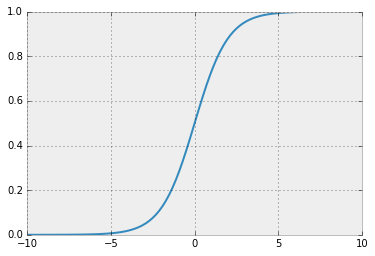

In [5]:
def sigmoid(a):  return 1 / (1 + np.exp(-a));

xvals = np.linspace(-10,10,100);
plt.plot(xvals, sigmoid(xvals));

### Sigmoid and Logit Functions

Its inverse is the **logit function** or the log-odds ratio,
    $$
    a = \ln \left( \frac{\sigma}{1-\sigma} \right)
    $$

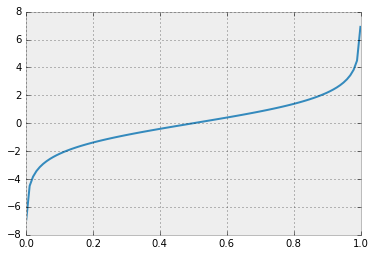

In [6]:
def logit(sigma): return np.log(sigma / (1-sigma));

xvals = np.linspace(0.001, 0.999, 100);
plt.plot(xvals, logit(xvals));

### Sigmoid and Logit Functions

The sigmoid function generalizes to the **normalized exponential** or **softmax** function:

sigmoid function:
$$ \sigma(a) = \frac{1}{1 + \exp(-a)}$$

softmax function:
$$
p_k = \frac{\exp(q_k)}{\sum_j \exp(q_j)}
$$

### Likelihood Function

- Depending on the label $y$, the likelihood $x$ is defined as
    $$
    \begin{align}
    P(t = 1 | x,w) &= \sigma(w^T \phi(x))= \frac{1}{1 + \exp(-w^T \phi(x))} \\
    P(t = 0 | x,w) &= 1 - \sigma(w^T \phi(x))=1-\frac{1}{1 + \exp(-w^T \phi(x))}
    \end{align}
    $$
- With a clever trick, the likelihood becomes
- Bernoulli distribution with $p=\sigma(w^T \phi(x))= \frac{1}{1 + \exp(-w^T \phi(x))}$  
    
    $$
    P(t | x,w) = \sigma(w^T \phi(x))^t \cdot (1 - \sigma(w^T \phi(x)))^{1-t}
    $$

### Logistic Regression

- For a data set $\{ (\phi(x_n), t_n) \}$ where $t_n \in \{ 0,1 \}$, the **likelihood function** is
    $$
    P(t | w) = \prod_{n=1}^N y_n^{t_n} (1-y_n) ^{1-t_n}=\prod_{n=1}^N \sigma(w^T \phi(x))^t \cdot (1 - \sigma(w^T \phi(x)))^{1-t}
    $$
    - where $y_n = P(C_1 | \phi(x_n)) = \sigma(w^T \phi(x_n))$
- Minimize the **loss function** $E(w) = -\ln P(t|w)$ to maximize the likelihood
where
$$
\ln P(t | w)=\sum_{n=1}^N \left[ 
        t_n \ln \sigma(w^T \phi(x_n)) + (1-t_n) \ln(1 - \sigma(w^T \phi(x_n))
  \right]
$$

### Derivation:  $\nabla_w \ln P(t | w)$

$ = \sum_{n=1}^N \nabla_w \left[ 
        t_n \ln \sigma(w^T \phi(x_n)) + (1-t_n) \ln(1 - \sigma(w^T \phi(x_n))
  \right]\\
  = \sum_{n=1}^N \nabla_w \left[ t_n \ln (y_n) + (1-t_n)\ln(1 - y_n)  \right]\\
$

where 

$
t_n \in {0,1}
$
 and 
$
y_n=\sigma(w^T \phi(x))= \frac{1}{1 + \exp(-w^T \phi(x))} 
$

Also,
$$
\nabla_w(y_n)=\nabla_w(\sigma(w^T \phi(x)))=\nabla_w( \frac{1}{1 + \exp(-w^T \phi(x))} )
=\nabla_w( {1 + \exp(-w^T \phi(x))}^{-1} )=-\frac{\nabla_w({1 + \exp(-w^T \phi(x))}}{[{1 + \exp(-w^T \phi(x))}]^{2}}=  -\frac{\nabla_w{\exp(-w^T \phi(x))}}{[{1 + \exp(-w^T \phi(x))}]^{2}}\\
=-\frac{\exp(-w^T \phi(x))}{[{1 + \exp(-w^T \phi(x))}]^{2}} \times \nabla_w[-w^T \phi(x)]=\frac{\exp(-w^T \phi(x))}{[{1 + \exp(-w^T \phi(x))}]^{2}} \times \nabla_w[w^T \phi(x)]=\frac{\exp(-w^T \phi(x))}{[{1 + \exp(-w^T \phi(x))}]} \times \frac{1}{[{1 + \exp(-w^T \phi(x))}]} \times \nabla_w[w^T \phi(x)]=y_n(1-y_n)\nabla_w[w^T \phi(x)]
$$

$$ 
\nabla_w \ln P(t | w)= \sum_{n=1}^N \nabla_w \left[ t_n \ln (y_n) + (1-t_n)\ln(1 - y_n)  \right]=\sum_{n=1}^N \left( 
        t_n       \frac{y_n (1-y_n )}{y_n} - (1-t_n) \frac{y_n (1-y_n )}{1-y_n }
    \right) \nabla_w\left[ w^T \phi(x_n) \right]
$$

$
= \sum_{n=1}^N \left( 
    t_n(1-y_n ) - (1-t_n) y_n 
    \right) \nabla_w\left[ w^T \phi(x_n) \right]
$

$
= \sum_{n=1}^N (t_n - y_n ) \phi(x_n)
= \sum_{n=1}^N \left[ t_n - \sigma(w^T \phi(x_n)) \right] \phi(x_n)
$

### Logistic Regression:  Gradient Descent

We have just shown that the gradient of the loss is
- Minimize the **loss function** $E(w) = -\ln P(t|w)$ to maximize the likelihood
    $$
    \begin{gather}
    \nabla_w E(w)= \nabla_w -\ln P(t|w)=- \sum_{n=1}^N \left[ t_n - \sigma(w^T \phi(x_n)) \right] \phi(x_n)=\sum_{n=1}^N (y_n - t_n) \phi(x_n) \\
    y_n = P(C_1 | \phi(x_n)) = \sigma(w^T \phi(x_n))
    \end{gather}
    $$

- This resembles the gradient expression from linear regression with least squares!
    - The first order ondition of loss function for logistic and linear function are both the same:
    $\nabla_w E(w)=\sum_{n=1}^N (y_n - t_n) \phi(x_n)$
    $$
    \begin{align}
    \text{Logistic} \quad & y_n - t_n = \sigma(w^T \phi(x_n)) - t_n \\
    \text{Linear} \quad & y_n - t_n = w^T \phi(x_n) - t_n
    \end{align}
    $$
- Notes: Matrix form and scalar form of FOC in linear model
    $$
    \begin{align}
    \nabla_w E(w)=\sum_{n=1}^N (w^T \phi(x_n) - t_n) \phi(x_n)=\Phi^{\top}\Phi w - \Phi^{\top}t
    \end{align}
    $$
    where 
$$
\Phi= \begin{bmatrix}
\phi_0(\vec{x}_1) & \phi_1(\vec{x}_1) & \cdots & \phi_{M-1}(\vec{x}_1) \\
\phi_0(\vec{x}_2) & \phi_1(\vec{x}_2) & \cdots & \phi_{M-1}(\vec{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(\vec{x}_N) & \phi_1(\vec{x}_N) & \cdots & \phi_{M-1}(\vec{x}_N) \\
\end{bmatrix}=\begin{bmatrix}
\phi(\vec{x}_1)^{\top}\\
\phi(\vec{x}_2)^{\top}\\
\phi(\vec{x}_3)^{\top}\\
\vdots\\
\phi(\vec{x}_N)^{\top}
\end{bmatrix}\\
\implies \Phi^{\top}=\begin{bmatrix}
\phi(\vec{x}_1) & \phi(\vec{x}_2) & \phi(\vec{x}_3) \cdots \phi(\vec{x}_N)
\end{bmatrix}\\
\implies w^{\top}\Phi^{\top}=\begin{bmatrix}
w^{\top}\phi(\vec{x}_1) & w^{\top}\phi(\vec{x}_2) & w^{\top}\phi(\vec{x}_3) \cdots w^{\top}\phi(\vec{x}_N)
\end{bmatrix}\\
$$

### Newton's Method:  Overview

- **Goal:**  Minimize a general function $F(w)$ in one dimension by solving for
    $$
    f(w) = \frac{\partial F}{\partial w} = 0
    $$
- **Newton's Method:** To find roots of $f$, Repeat until convergence:
    $$
    w \leftarrow w - \frac{f(w)}{f'(w)}
    $$

- **informal sketch idea of Newton's method:** Find the tangent line of curve $y=f(x)$ at $x=x_n$

$$
(y-f(x_n))=f'(x_n)(x-x_n) \implies y=f'(x_n)(x-x_n)+f(x_n)\\
\text{Set }y=0\text{ and }x=x_{n+1}\\
0=y=f'(x_n)(x_{n+1}-x_n)+f(x_n) \implies x_{n+1}=x_n-\frac{f(x_n)}{f'(x_{n+1})}
$$


### Newton's Method:  Geometric Intuition

- Find the roots of $f(w)$ by following its **tangent lines**.  The tangent line to $f$ at $w_{k-1}$ has equation
    $$
    \ell(w) = f(w_{k-1}) + (w-w_{k-1}) f'(w_{k-1})
    $$
- Set next iterate $w_{k+1}$ to be **root** of tangent line:
    $$
    \begin{gather}
    f(w_{k-1}) + (w-w_{k-1}) f'(w_{k-1}) = 0 \\
    \implies \boxed{ w = w_{k-1} - \frac{f(w_{k-1})}{f'(w_{k-1})} }
    \end{gather}
    $$

### Newton's Method:  Geometric Intuition

<img src="images/newton.jpg">

Newton's Method did not converge.
("Newton's Method:", 6.018373602193873)


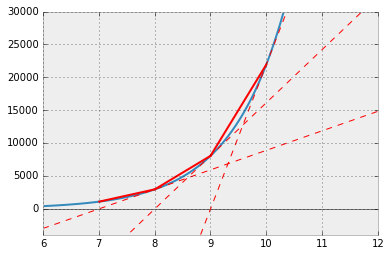

In [19]:
# custom newton's method -- see Canvas
# There's another .py file in the same directory called newton_plot.py See the method in that file to know the code
from newton_plot import *;

def fn(x): return np.exp(x) - x**2;
def d1(x): return np.exp(x) - 2*x;
def d2(x): return np.exp(x) - 2;

lst = [];
print("Newton's Method:", newton_exact(d1, d2, 10, lst=lst, maxn=4));
plot_optimization(plt.gca(), fn, d1, lst, xlim=(6,12), ylim=(-4000, 30000), tangents=True);

Newton's Method did not converge.
("Newton's Method:", -0.0625)


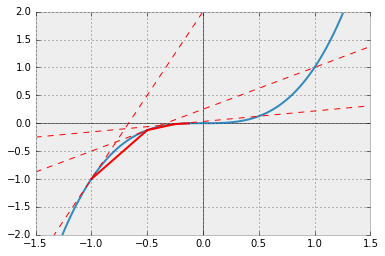

In [21]:
# custom newton's method -- see Canvas
from newton_plot import *;

def fn(x): return x**3;
def d1(x): return 3 * x**2;
def d2(x): return 6 * x;

lst = [];
print("Newton's Method:", newton_exact(d1, d2, -1, lst=lst, maxn=4));
plot_optimization(plt.gca(), fn, d1, lst, xlim=(-1.5,1.5), ylim=(-2,2), tangents=True);

### Newton's Method:  Recap

To minimize $F(w)$, find roots of $F'(w)$ via Newton's Method.

**Repeat until convergence**:
$$
\boxed{w \leftarrow w - \frac{F'(w)}{F''(w)}}
$$

### Newton's Method:  Multivariate Case

Replace second derivative with the **Hessian Matrix**,
    $$
    H_{ij}(w) = \frac{\partial^2 F}{\partial w_i \partial w_j}
    $$

Newton update becomes:
$$
\boxed{ w \leftarrow w - H^{-1} \nabla_w F}
$$

### Recall:  Linear Regression

- For linear regression, least squares has a **closed-form solution**:
    $$
    w_{ML} = (\Phi^T \Phi)^{-1} \Phi^T t
    $$
- This generalizes to weighted least squares, with diagonal weight matrix $R$,
    $$
    w_{WLS} = (\Phi^T R \Phi)^{-1} \Phi^T R t
    $$

### Logistic Regression:  Newton's Method

- For logistic regression, however, $\nabla_w E(w) = 0$ is **nonlinear**, and no closed-form solution exists.
    $$
    \begin{align}
    \quad &0= \nabla_w E(w)=\sum_{n=1}^N (y_n - t_n) \phi(x_n)\\
    \text{Logistic} \quad & y_n - t_n = \sigma(w^T \phi(x_n)) - t_n \\
    \text{Linear} \quad & y_n - t_n = w^T \phi(x_n) - t_n
    \end{align}
    $$

### We must iterate!

- Newton's method is a good choice in many cases.

### Iterative Solution

- Apply Newton's method to solve $\nabla_w E(w) = 0$
- This involves least squares with weights $R_{nn} = y_n (1-y_n) $
- Since $R$ depends on $w$, and vice-versa, we get...

**Iteratively-Reweighted Least Squares (IRLS)**
<div style="border: 1px solid black; display: block; padding: 15px; margin: 10px 0">
Repeat Until Convergence:
<br>
1. $w^{(new)} = w_{WLS} = (\Phi^T R \Phi)^{-1} \Phi^T R z$
<br>
2. $z = \Phi w^{(old)} - R^{-1} (y - t)$
</div>
    